# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress, pearsonr
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice.
total_mice = len(mouse_data_complete["Mouse ID"].unique())

# Displays total_mice
total_mice

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify duplicate rows
duplicate_data = mouse_data_complete[mouse_data_complete.duplicated()]

# Displays duplicate_data
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989",:]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_dataframe = mouse_data_complete.drop(mouse_data_complete[mouse_data_complete["Mouse ID"] == 'g989'].index)

# Display clean_dataframe
clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice in the clean DataFrame.
len(clean_dataframe["Mouse ID"].unique())

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Mean
mean_series = clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

# Median
median_series = clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

# Variance 
variance_series = clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

# Standard Deviation
std_series = clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

# SEM
sem_series = clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

# Concatenate the each series into a DataFrame
summary_statistics_table = pd.concat([mean_series, median_series, variance_series, std_series, sem_series], axis=1)

# Change the column names for each of the series 
summary_statistics_table.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", 
                                    "Tumor Volume Std. Err."]
# Displays summary_statistics_table
summary_statistics_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation = clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Change the column names for each of the series 
aggregation.columns = ["Mean", "Median", "Var", "std", "Sem"]

# Displays aggregation
aggregation


,Mean,Median,Var,std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

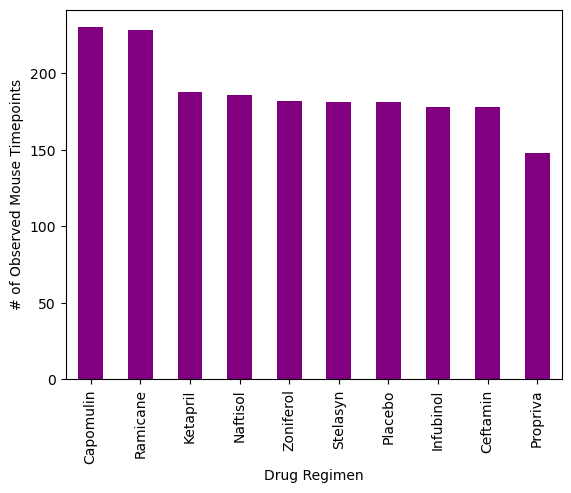

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Counts the amount of mouse per drug
drug_regimen_data = clean_dataframe["Drug Regimen"].value_counts()

# Configure bar plot to graph the drug_regimen_data using pandas
bar_plot = drug_regimen_data.plot(kind = "bar", facecolor = "purple", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")

# Displays bar_plot
bar_plot


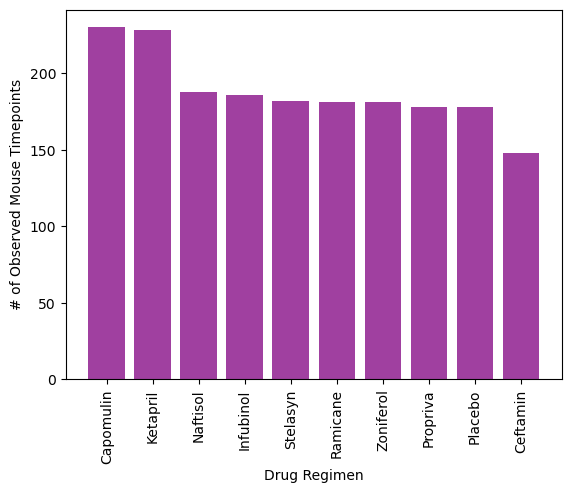

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Defining x and y axis
x_axis = clean_dataframe["Drug Regimen"].unique()
y_axis = drug_regimen_data

# Plotting bar chart using pyplot
plt.bar(x_axis, y_axis, color = 'purple', alpha = 0.75, align = "center")

# Setting up ticks and labels for each axis
plt.xticks(x_axis, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Displays bar chart
plt.show()


<Axes: ylabel='Sex'>

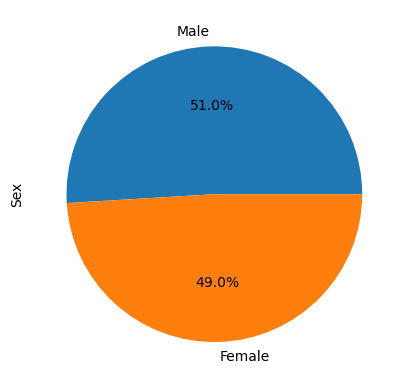

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Counts the amount of mouse per sex
gender_data = clean_dataframe["Sex"].value_counts()

# Configure pie plot to graph the gender_data using pandas
pie_plot = gender_data.plot(kind = "pie",autopct="%.1f%%")

# Set label on the y-axis
pie_plot.set_ylabel("Sex")

# Displays pie chart
pie_plot


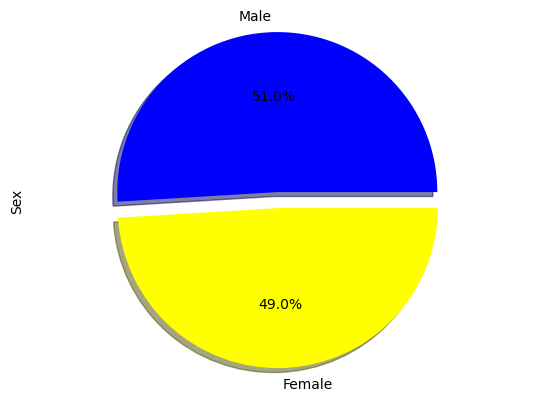

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["Male", "Female"]
colors = ["blue", "yellow"]
explode = (0.1,0)

# Plotting pie chart using pyplot
plt.pie(gender_data, explode = explode, labels = sex, colors = colors,
        autopct = "%1.1f%%", shadow = True, startangle = 360)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set label on the y-axis
plt.ylabel("Sex")

# Displays pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= clean_dataframe.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merging_data = pd.merge(max_timepoint, clean_dataframe, on=["Mouse ID", "Timepoint"], how = "left")

# Displays merging_data dataframe
merging_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [36]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []

# Opening a for-loop to loop through list_of_drugs
for drug in list_of_drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    df = merging_data.loc[merging_data["Drug Regimen"] == drug]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = df["Tumor Volume (mm3)"].quantile([.25,.5,.75])

    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = df.loc[(df["Tumor Volume (mm3)"] < lower_bound) | (df["Tumor Volume (mm3)"] > upper_bound)]
    
    # Print Outliers for each drug analyzed
    print(f"{drug} outliers: {outliers['Tumor Volume (mm3)']}")
    
    # add subset
    tumor_volume_data.append(df["Tumor Volume (mm3)"])



Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


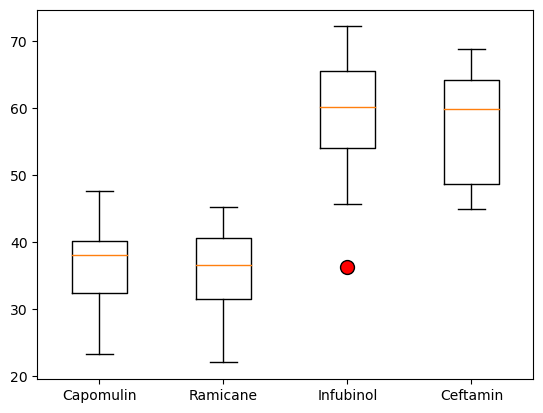

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels = list_of_drugs, flierprops = dict(markersize = 10, markerfacecolor = "red"))

# Displays box plot
plt.show()

## Line and Scatter Plots

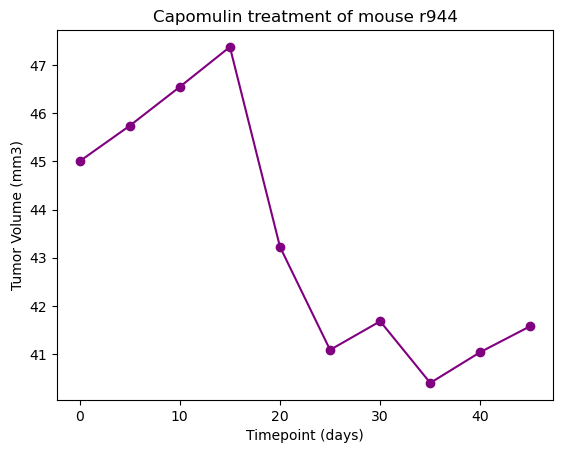

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for a single mouse treated with Capomulin
mouse_id = "r944"
capomulin_mouseID_data = clean_dataframe[(clean_dataframe["Drug Regimen"] == "Capomulin") & (clean_dataframe["Mouse ID"] == mouse_id)]

# Set up x and y axis
x_axis_line = capomulin_mouseID_data["Timepoint"]
y_axis_line = capomulin_mouseID_data["Tumor Volume (mm3)"]

# Create a line plot of Timepoint vs. Tumor volume
plt.plot(x_axis_line, y_axis_line, marker = "o", color = "purple")

# Setting up title and labels for each axis
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouse_id}")

# Displays line plot
plt.show()


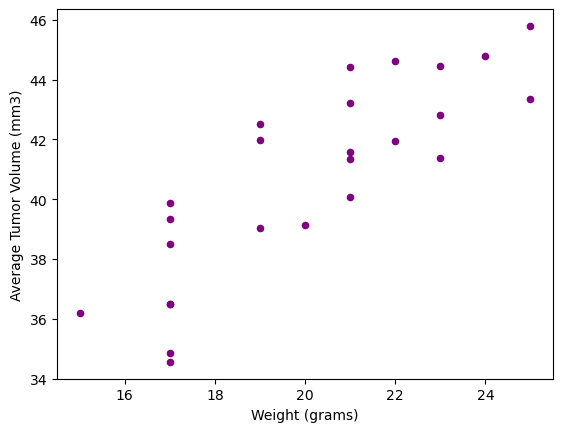

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for treated with Capomulin
capomulin_data = clean_dataframe[(clean_dataframe['Drug Regimen'] == 'Capomulin')]

# Gets the mean for each category in the plot
weight_per_ID = capomulin_data.groupby(["Mouse ID"])["Weight (g)"].mean()
tumor_volume_per_ID = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Add the two categories together into a single dataframe
weight_and_tumor_volume= pd.concat([weight_per_ID, tumor_volume_per_ID], axis = 1)

# Change column names
weight_and_tumor_volume.columns = ["Weight (grams)", "Average Tumor Volume (mm3)"]

# Create a scatter plot of mouse weight and the average observed tumor volume for the entire Capomulin regimen
weight_and_tumor_volume.plot(kind = "scatter", x = "Weight (grams)", y = "Average Tumor Volume (mm3)", color = "purple")

# Displays scatter plot
plt.show()

## Correlation and Regression

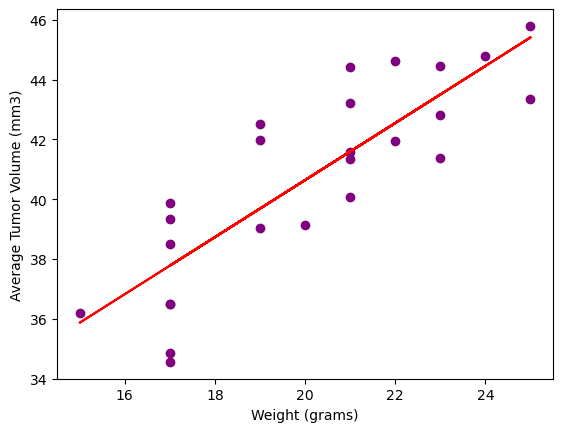

The correlation coefficient between mouse weight and average tumor volume for the entire Capomulin regimen is 0.84


In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Setting up x and y axis
x_values = weight_per_ID
y_values = tumor_volume_per_ID

# Calculating linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
regress_values = x_values * slope + intercept

# Create a scatter plot of mouse weight and the average tumor volume for the entire Capomulin regimen, adding the linear regression line
plt.scatter(x_values,y_values, color = "purple")
plt.plot(x_values,regress_values, "r-")

# Setting up labels for each axis
plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")

# Displays scatter plot
plt.show()

# Calculates the correlation coefficient using the "pearsonr" function and prints it
correlation_coefficient = round(pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the entire Capomulin regimen is {correlation_coefficient}")
